In [17]:
import pandas as pd

# Read CSV and plot histogram of the last column
import matplotlib.pyplot as plt

df = pd.read_csv("env.sel3.sk_sc.csv")
col = df.columns[-1]
series = pd.to_numeric(df[col], errors="coerce").dropna()

In [18]:
# Map numeric occupancy to the requested strings in the existing series
series = series.map(lambda x: "occupied" if int(x) == 1 else "non-occupied")

# (Optional) keep the dataframe column in sync
df[col] = series

In [19]:
series

0       non-occupied
1       non-occupied
2       non-occupied
3       non-occupied
4       non-occupied
            ...     
2860    non-occupied
2861    non-occupied
2862    non-occupied
2863    non-occupied
2864    non-occupied
Name: occupancy, Length: 2865, dtype: object

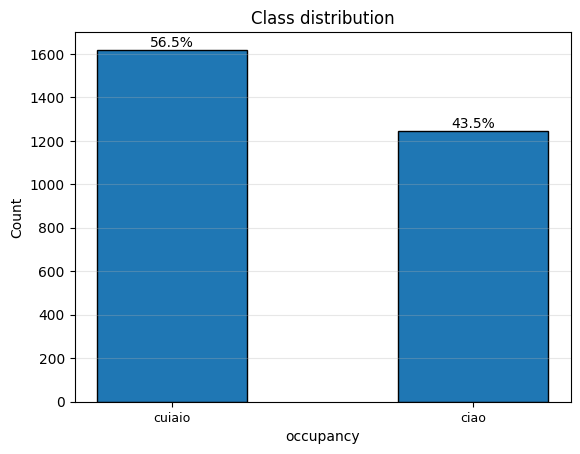

In [ ]:
# Re-draw histogram but skip bins with zero counts
lefts = list(bins[:-1])
widths = [bins[i+1] - bins[i] for i in range(len(bins)-1)]
nonzero_idxs = [i for i, c in enumerate(counts) if c > 0]

# If no non-empty bins, show empty plot
if not nonzero_idxs:
    plt.cla()
    ax = plt.gca()
    ax.set_xticks([])          # remove x-axis values
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title("Class distribution (no values)")
    plt.show()
else:
    lefts_nz = [lefts[i] for i in nonzero_idxs]
    widths_nz = [widths[i] for i in nonzero_idxs]
    counts_nz = [counts[i] for i in nonzero_idxs]

    centers = [l + w/2 for l, w in zip(lefts_nz, widths_nz)]

    plt.cla()
    plt.bar(centers, counts_nz, width=widths_nz, color="C0", edgecolor="k", align="center")
    ax = plt.gca()

    # Add bin labels below each bar
    #labels_nz = [f"{bins[i]:.3f}–{bins[i+1]:.3f}" for i in nonzero_idxs]
    labels_nz = [f"non-occupied", "occupied"]
    ax.set_xticks(centers)
    ax.set_xticklabels(labels_nz, rotation=0, fontsize=9)

    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title("Class distribution")
    plt.grid(axis="y", alpha=0.3)

    # Add percentage labels
    total = sum(counts_nz)
    for c, x, w in zip(counts_nz, centers, widths_nz):
        percentage = f"{c/total:.1%}"
        plt.text(x, c, percentage, ha='center', va='bottom', fontsize=10)

    plt.show()

In [23]:
counts

array([1619.,    0., 1246.])

In [6]:
series

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
2860   -1
2861   -1
2862   -1
2863   -1
2864   -1
Name: occupancy, Length: 2865, dtype: int64